In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("f1_monaco_2024_cleaned.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Driver         3159 non-null   object 
 1   DriverName     3159 non-null   object 
 2   Team           3159 non-null   object 
 3   Session        3159 non-null   object 
 4   LapNumber      3159 non-null   float64
 5   Stint          3159 non-null   float64
 6   Compound       3159 non-null   object 
 7   LapTime_s      3159 non-null   float64
 8   Sector1Time_s  3159 non-null   float64
 9   Sector2Time_s  3159 non-null   float64
 10  Sector3Time_s  3159 non-null   float64
dtypes: float64(6), object(5)
memory usage: 271.6+ KB


In [21]:
df.head()

,Driver,DriverName,Team,Session,LapNumber,Stint,Compound,LapTime_s,Sector1Time_s,Sector2Time_s,Sector3Time_s
0,VER,VER,Red Bull Racing,FP1,1.0,1.0,MEDIUM,102.030,28.052,49.466,24.512
1,VER,VER,Red Bull Racing,FP1,2.0,1.0,MEDIUM,78.049,20.929,36.583,20.537
2,VER,VER,Red Bull Racing,FP1,3.0,1.0,MEDIUM,100.449,25.065,49.473,25.911
3,VER,VER,Red Bull Racing,FP1,4.0,1.0,MEDIUM,75.625,20.154,35.585,19.886
4,VER,VER,Red Bull Racing,FP1,5.0,1.0,MEDIUM,97.846,25.751,50.907,21.188


In [22]:
driver_count = df["Driver"].nunique()
print("Total Drivers in Dataset:", driver_count)

df["Driver"].value_counts()

Total Drivers in Dataset: 20


Driver
ALB    190
RUS    187
SAI    187
LEC    184
TSU    183
VER    183
RIC    180
NOR    180
HAM    180
PIA    174
SAR    166
ZHO    165
GAS    163
ALO    162
STR    153
BOT    138
OCO    100
MAG    100
HUL     99
PER     85
Name: count, dtype: int64

In [23]:
print("Session Distribution:")
print(df["Session"].value_counts())

Session Distribution:
Session
R      1210
FP2     613
FP1     558
FP3     434
Q       344
Name: count, dtype: int64


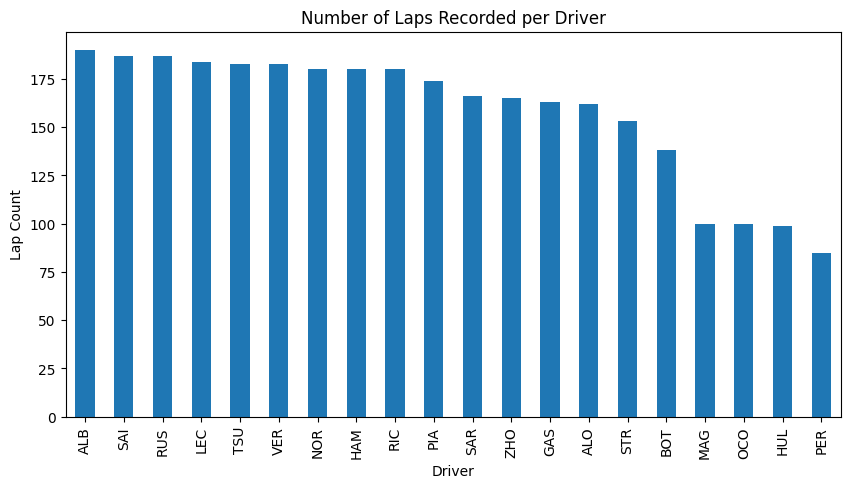

In [24]:
laps_per_driver = df.groupby("Driver")["LapNumber"].count().sort_values(ascending=False)

plt.figure(figsize=(10,5))
laps_per_driver.plot(kind="bar")
plt.title("Number of Laps Recorded per Driver")
plt.xlabel("Driver")
plt.ylabel("Lap Count")
plt.show()


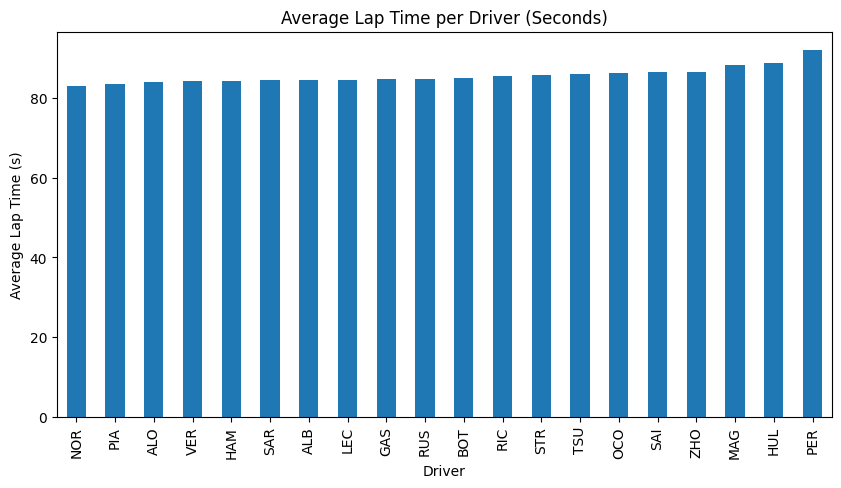

Driver
NOR    83.178400
PIA    83.468874
ALO    84.148586
VER    84.222574
HAM    84.386833
SAR    84.536060
ALB    84.666653
LEC    84.673560
GAS    84.831669
RUS    84.901647
BOT    85.195565
RIC    85.606322
STR    85.907484
TSU    86.108847
OCO    86.206310
SAI    86.530310
ZHO    86.582333
MAG    88.422010
HUL    88.911313
PER    92.089565
Name: LapTime_s, dtype: float64

In [25]:
avg_lap = df.groupby("Driver")["LapTime_s"].mean().sort_values()

plt.figure(figsize=(10,5))
avg_lap.plot(kind="bar")
plt.title("Average Lap Time per Driver (Seconds)")
plt.xlabel("Driver")
plt.ylabel("Average Lap Time (s)")
plt.show()

avg_lap


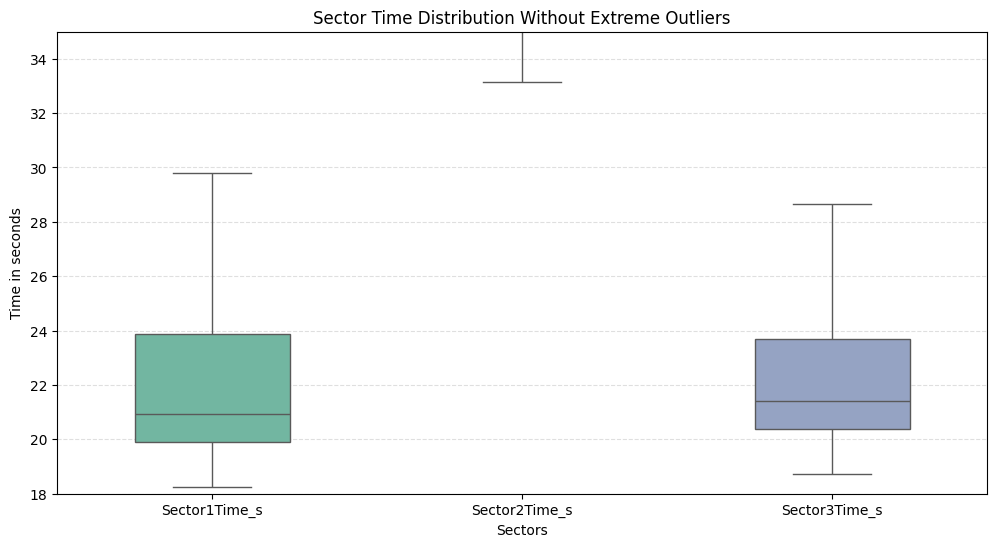

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df[["Sector1Time_s", "Sector2Time_s", "Sector3Time_s"]],
    palette="Set2",
    width=0.5,
    showfliers=False   # hide outliers from visual clutter
)

plt.ylim(18, 35)  # zoom to realistic F1 sector range
plt.title("Sector Time Distribution Without Extreme Outliers")
plt.ylabel("Time in seconds")
plt.xlabel("Sectors")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()



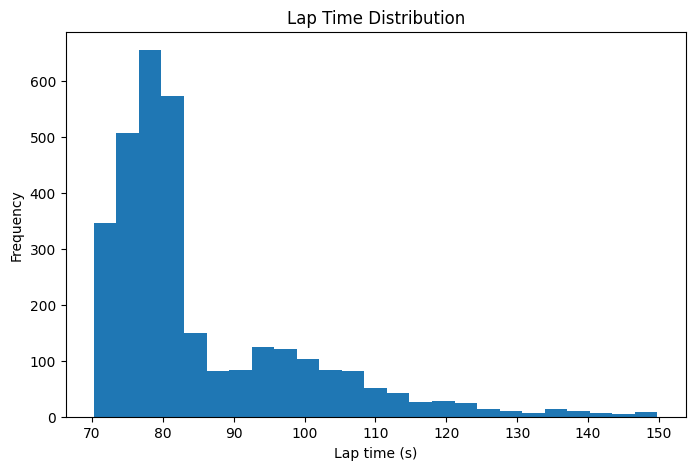

In [27]:
plt.figure(figsize=(8,5))
plt.hist(df["LapTime_s"], bins=25)
plt.title("Lap Time Distribution")
plt.xlabel("Lap time (s)")
plt.ylabel("Frequency")
plt.show()


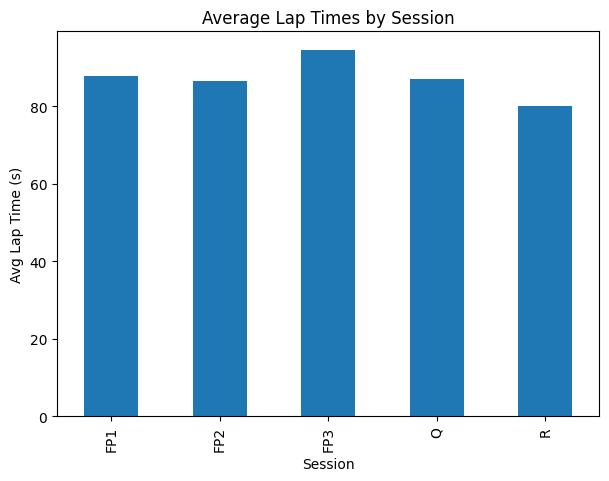

Session
FP1    87.658348
FP2    86.595462
FP3    94.537652
Q      86.987317
R      80.010196
Name: LapTime_s, dtype: float64

In [28]:
avg_session = df.groupby("Session")["LapTime_s"].mean()

plt.figure(figsize=(7,5))
avg_session.plot(kind="bar")
plt.title("Average Lap Times by Session")
plt.xlabel("Session")
plt.ylabel("Avg Lap Time (s)")
plt.show()

avg_session


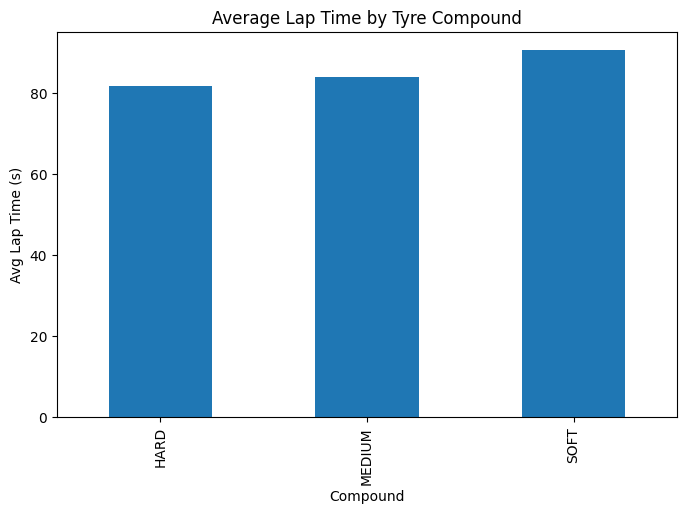

In [29]:
if "Compound" in df.columns:
    avg_compound = df.groupby("Compound")["LapTime_s"].mean().sort_values()

    plt.figure(figsize=(8,5))
    avg_compound.plot(kind="bar")
    plt.title("Average Lap Time by Tyre Compound")
    plt.xlabel("Compound")
    plt.ylabel("Avg Lap Time (s)")
    plt.show()

    avg_compound


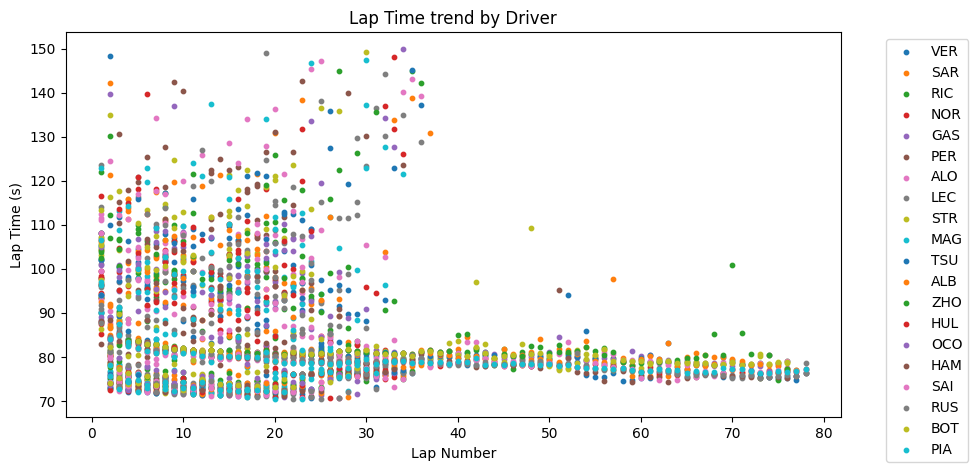

In [30]:
plt.figure(figsize=(10,5))
for d in df["Driver"].unique():
    subset = df[df["Driver"] == d]
    plt.scatter(subset["LapNumber"], subset["LapTime_s"], label=d, s=10)

plt.title("Lap Time trend by Driver")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (s)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


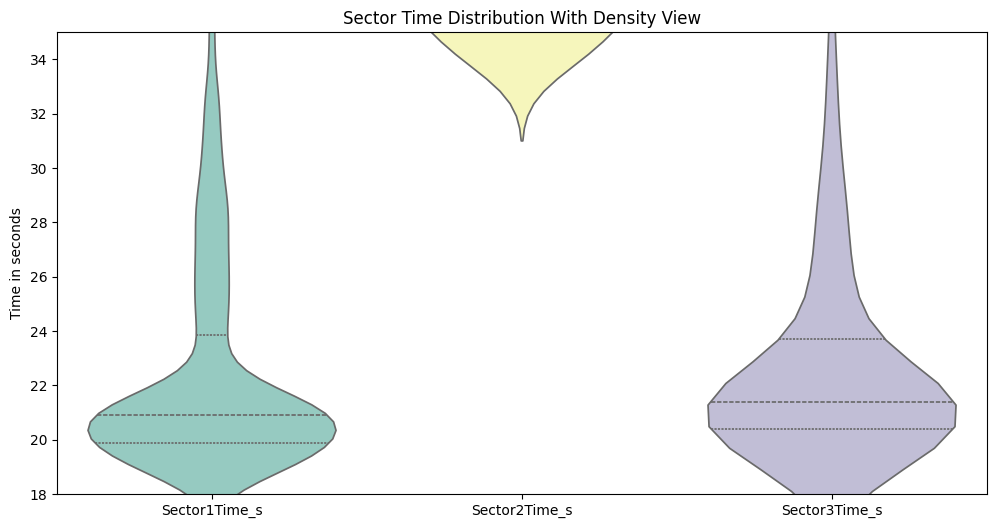

In [32]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=df[["Sector1Time_s", "Sector2Time_s", "Sector3Time_s"]],
    inner="quartile",
    palette="Set3"
)
plt.ylim(18, 35)
plt.title("Sector Time Distribution With Density View")
plt.ylabel("Time in seconds")
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_23020\3398409190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


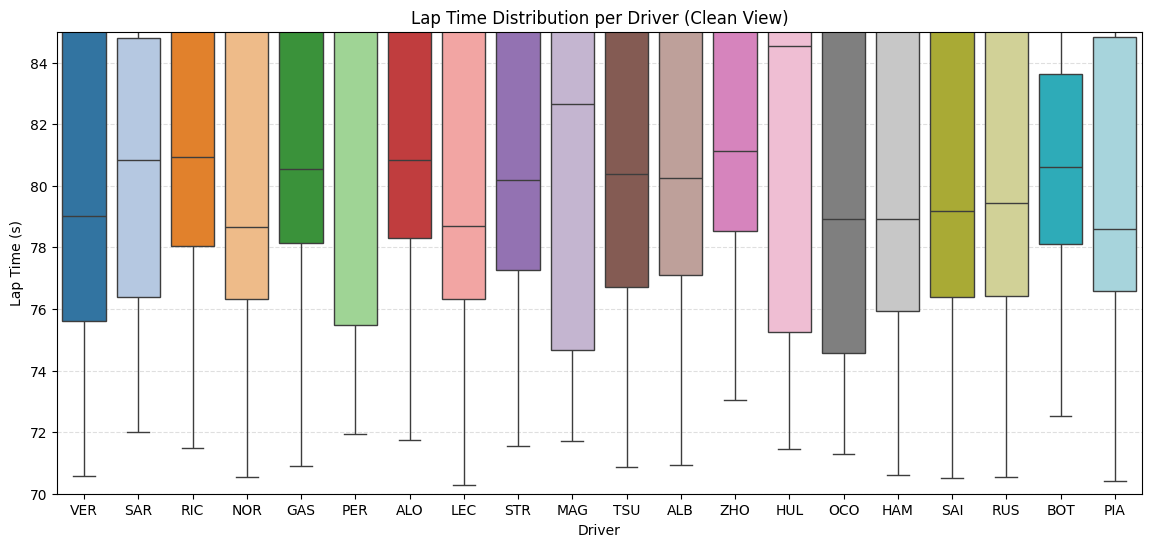

In [33]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df,
    x="Driver", y="LapTime_s",
    palette="tab20",
    showfliers=False
)
plt.ylim(70, 85)
plt.title("Lap Time Distribution per Driver (Clean View)")
plt.ylabel("Lap Time (s)")
plt.xlabel("Driver")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


In [34]:
corr = df[["LapTime_s","Sector1Time_s","Sector2Time_s","Sector3Time_s"]].corr()


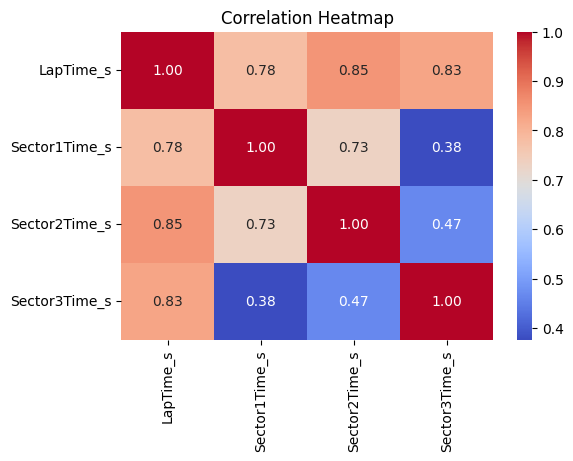

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


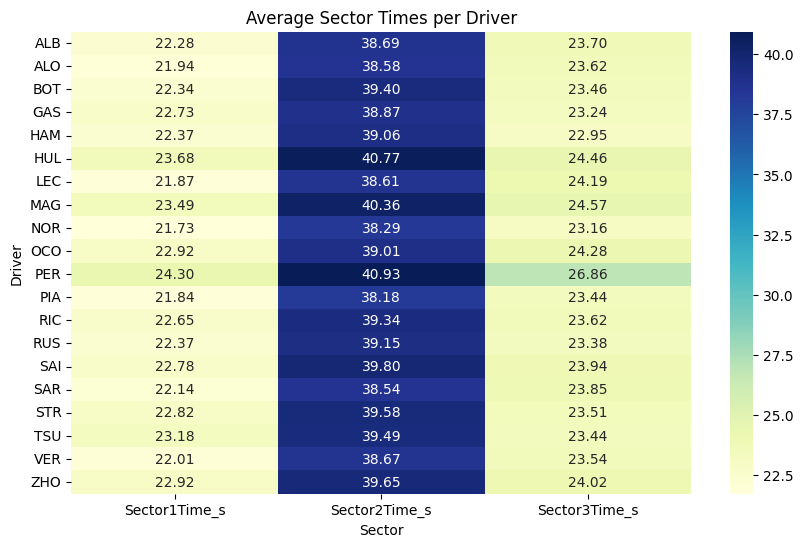

In [36]:
avg_sector_driver = df.groupby("Driver")[["Sector1Time_s","Sector2Time_s","Sector3Time_s"]].mean()

plt.figure(figsize=(10,6))
sns.heatmap(avg_sector_driver, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Sector Times per Driver")
plt.xlabel("Sector")
plt.ylabel("Driver")
plt.show()
